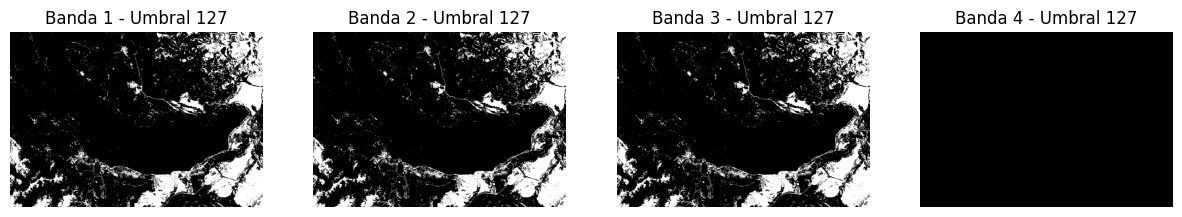

In [1]:
import cv2
import matplotlib.pyplot as plt

def aplicar_umbral_por_banda(imagen_path, umbral):
    # Cargar la imagen
    imagen = cv2.imread(imagen_path, cv2.IMREAD_UNCHANGED)

    # Verificar que la imagen se haya cargado y tiene múltiples bandas
    if imagen is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen en la ruta: {imagen_path}")
    if len(imagen.shape) != 3:
        raise ValueError("La imagen no tiene múltiples bandas.")

    # Separar las bandas
    bandas = cv2.split(imagen)

    # Aplicar el umbral a cada banda
    imagenes_binarias = [cv2.threshold(banda, umbral, 255, cv2.THRESH_BINARY)[1] for banda in bandas]

    # Mostrar las imágenes binarias para cada banda
    plt.figure(figsize=(15, 5))
    for i, imagen_binaria in enumerate(imagenes_binarias, start=1):
        plt.subplot(1, len(imagenes_binarias), i)
        plt.imshow(imagen_binaria, cmap='gray')
        plt.title(f'Banda {i} - Umbral {umbral}')
        plt.axis('off')
    plt.show()

# Parámetros
imagen_path = 'bariloche2/B1.tif'
umbral = 127  # Cambia este valor según el umbral deseado

# Aplicar el umbral y mostrar las imágenes binarias
aplicar_umbral_por_banda(imagen_path, umbral)